<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/wash_indeed_8_10_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://content.lib.washington.edu/projects/sea15/index.html
https://lni.wa.gov/workers-rights/wages/minimum-wage/history-of-washington-states-minimum-wage

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_wa_05_31_21.csv")
df.shape

NameError: ignored

In [ ]:
#pandas!
pd.set_option('display.max_rows', 500) 

#dates!
df['review_date'] = pd.to_datetime(df['review_date'])
df.set_index(pd.DatetimeIndex(df['review_date']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42496 entries, 0 to 42495
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   platform              42496 non-null  object        
 1   scrape_company_num    42496 non-null  int64         
 2   date_scraped          42496 non-null  object        
 3   scrape_folder_name    42496 non-null  object        
 4   scrape_file_name      42496 non-null  object        
 5   base_url              42496 non-null  object        
 6   page_num              42496 non-null  int64         
 7   parent_company        42496 non-null  object        
 8   be_careful            42496 non-null  int64         
 9   company_name          42496 non-null  object        
 10  scraped_from_url      42496 non-null  object        
 11  empid                 42496 non-null  object        
 12  language              0 non-null      float64       
 13  id              

Text(0.5, 1.0, 'Reviews in WA')

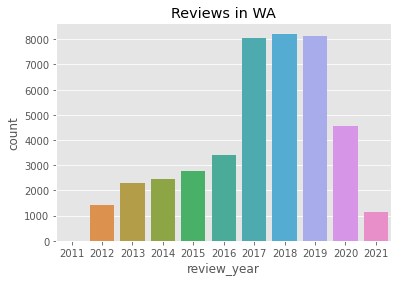

In [ ]:
sns.countplot(data=df, x='review_year')
plt.title("Reviews in WA")

In [ ]:

#df = df[df.be_careful!=1]

In [ ]:
# Cut off before 2012

df = df[df.review_year>=2012]
#df = df[df.review_year<2021]
#sns.countplot(data=df, x='review_year')
#plt.title("Reviews in WA")

In [ ]:
districts = ['Seattle', 'North Seattle', 'Northgate', 'Lake City', 'North Seattle',
                'Windermere', 'Ravenna', 'University District', 'Lake Union', 'Lower Wallingford',
                'Fremont', 'Ballard', 'Central Seattle', 'Magnolia', 'Queen Anne', 'Capitol Hill',
                'Broadway', 'Stevens', 'Madison Park', 'South Lake Union', 'Central Area', 'Atlantic',
                'Madrona', 'Harrison', 'Denny-Blaine', 'South End', 'Rainier Valley', 'Columbia City',
                'Seward Park', 'Beacon Hill', 'West Seattle', 'Delridge', 'Georgetown', 'Southeast Seattle']

In [ ]:
df['treat_loc'] = 0
df.loc[df.city.isin(districts),'treat_loc']= 1
# elimnate SeaTac for now...
print(df.shape)
df = df.drop(df[df.city=='SeaTac'].index)
print(df.shape)


(42485, 48)
(42372, 48)


In [ ]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

Total number of reviews: 42372
Total reviews in Seattle: 6312


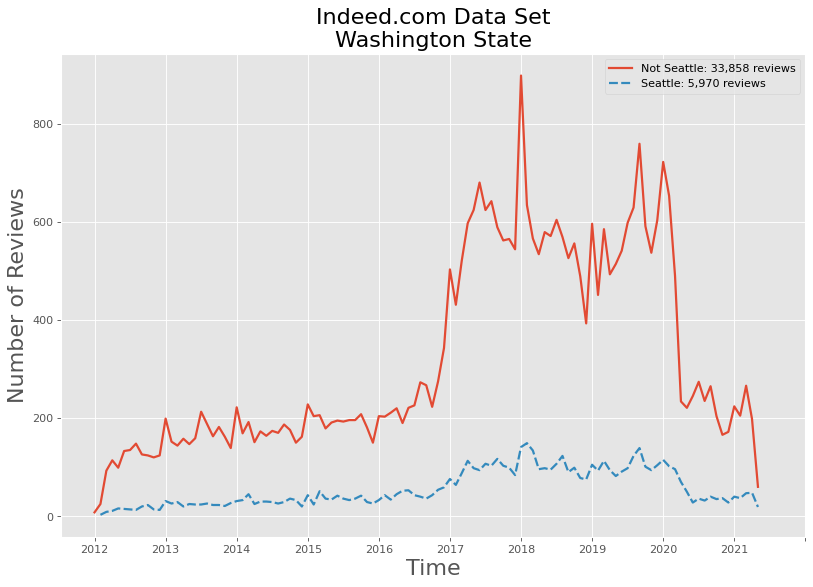

In [ ]:
# Cut off before 2013, after 2020
#df = df[df.review_year>2012]
#df = df[df.review_year<2021]

print('Total number of reviews:', df.shape[0])
print('Total reviews in Seattle:', df.treat_loc.sum())

data_viz = df[['month_year', 'treat_loc']]
data_viz = data_viz.groupby(['month_year', 'treat_loc']).size().reset_index(name='count')
#data_viz = data_viz.groupby(['review_year', 'treat_loc']).agg({'count'})

#print(data_viz)

figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Indeed.com Data Set\nWashington State", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Seattle: 33,858 reviews', 'Seattle: 5,970 reviews'])


13918


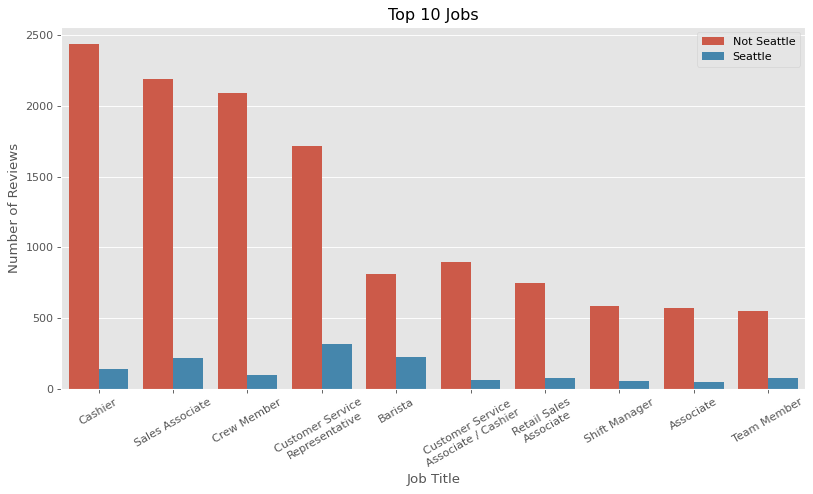

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_jobs = df.norm_job_title.value_counts()[:10].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'treat_loc', order = top_jobs)
plt.title("Top 10 Jobs")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
l= ['Cashier', 'Sales Associate', 'Crew Member', 'Customer Service\nRepresentative', 'Barista', 'Customer Service\nAssociate / Cashier', 'Retail Sales\nAssociate', 'Shift Manager', 'Associate', 'Team Member']
plt.xticks(ticks=locs, labels=l, rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Seattle', 'Seattle'])

13918


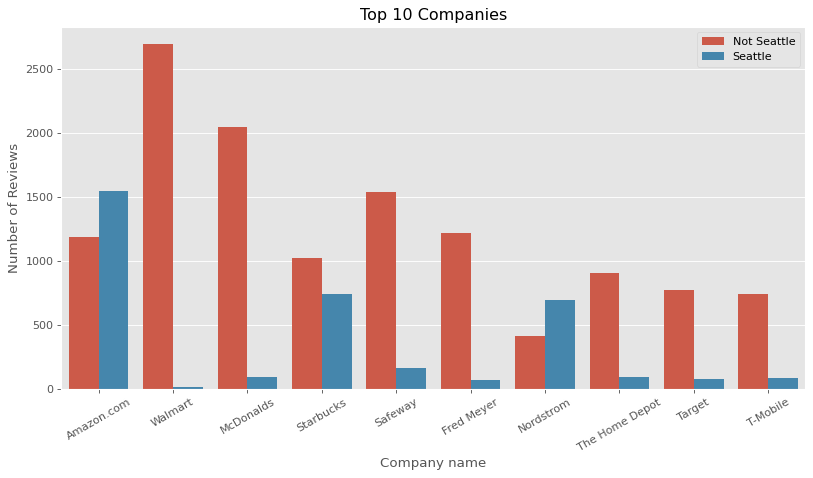

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_comp = df.company_name.value_counts()[:10].index.tolist()
comp_df = df[df.company_name.isin(top_comp)]
print(job_df.shape[0])
sns.countplot(data=comp_df, x='company_name', hue = 'treat_loc', order = top_comp)
plt.title("Top 10 Companies")
plt.xlabel('Company name')
locs, labs = plt.xticks()
plt.xticks(rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Seattle', 'Seattle'])

In [ ]:
comp = df.groupby(['month_year', 'treat_loc']).agg({'overall_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

,month_year,treat_loc,mean,count
0,2012-01,0,4.125000,8
1,2012-02,0,3.720000,25
2,2012-02,1,2.666667,3
3,2012-03,0,3.688172,93
4,2012-03,1,3.666667,9
5,2012-04,0,3.692982,114
6,2012-04,1,3.000000,11
7,2012-05,0,3.626263,99
8,2012-05,1,3.812500,16
9,2012-06,0,3.721805,133


In [ ]:
df.review_date.min()

Timestamp('2012-01-02 00:00:00')

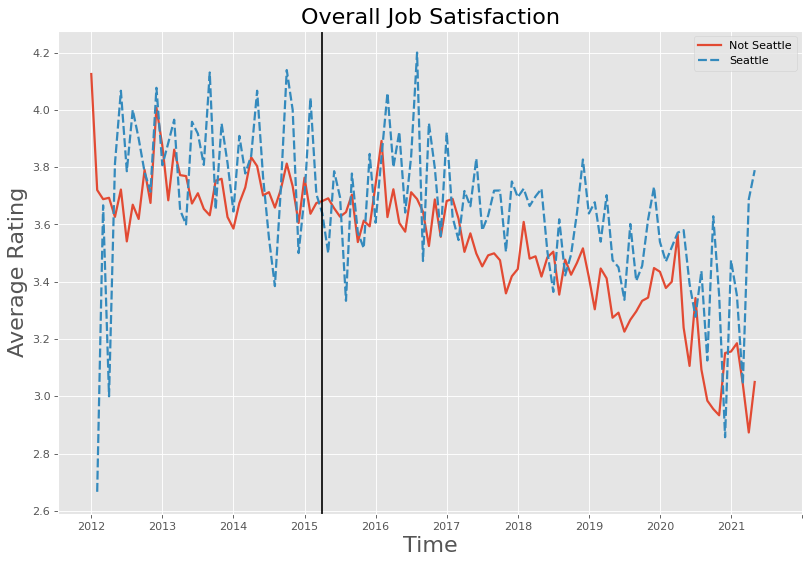

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=comp, x='month_year', y='mean', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Overall Job Satisfaction", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Seattle', 'Seattle'])
plt.axvline(x=39, color = 'black')

In [ ]:
f = df[df.company_name.isin(['Amazon.com', 'Walmart', 'McDonalds', 'Starbucks'])]
domp = f.groupby(['month_year', 'company_name']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)
domp

,month_year,company_name,mean,count
0,2012-01,McDonalds,3.500000,2
1,2012-02,McDonalds,4.000000,1
2,2012-02,Walmart,4.000000,1
3,2012-03,McDonalds,4.000000,7
4,2012-03,Walmart,3.500000,4
5,2012-04,McDonalds,4.000000,6
6,2012-04,Starbucks,4.400000,5
7,2012-04,Walmart,3.500000,8
8,2012-05,McDonalds,3.500000,4
9,2012-05,Starbucks,4.000000,4


([<matplotlib.axis.XTick at 0x7fd3c7fc9d10>,
 [Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019'),
  Text(0, 0, '2020'),
  Text(0, 0, '2021')])

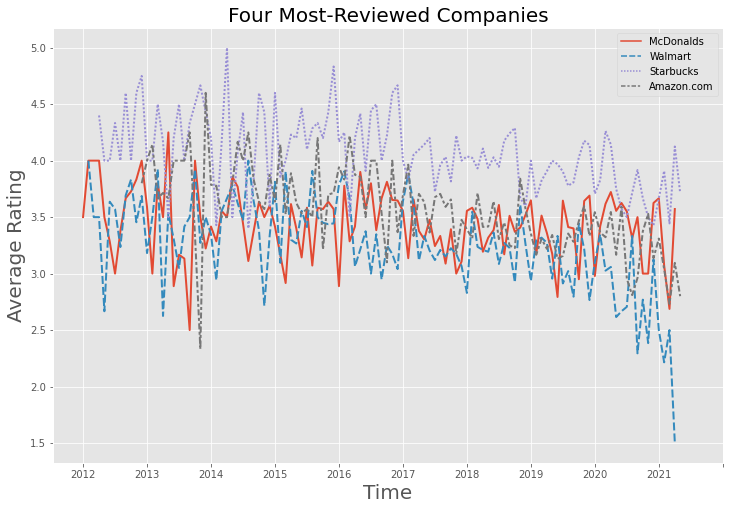

In [ ]:
### plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Four Most-Reviewed Companies", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
#plt.legend(['Not Seattle', 'Seattle'])

In [ ]:
# create output for R
df['post'] = 0
mask = (df['review_date']>='04/01/2015')
df.post[mask]=1


df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/wash_rdf.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
